## 맨하튼 집값 예측하기_회귀분석 머신러닝

[Kaggle] https://www.kaggle.com/zohaib30/streeteasy-dataset/version/1

[Cross validation과 GridSearch하는 방법] https://techblog-history-younghunjo1.tistory.com/100

[사이킷 런 교차 검증] https://dsbook.tistory.com/133?category=761052

### 필요한 패키지 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

### 데이터 불러오기 및 EDA

In [2]:
df = pd.read_csv('manhattan.csv')
df.head(3)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


In [4]:
df.describe()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000
mean,5332.589997,5138.940379,1.351936,1.366770,939.727324,4.970896,11.908307,51.994914,0.403504,0.154846,0.160215,0.281153,0.294716,0.185646,0.055100,0.174908
std,3311.552136,3162.824760,0.967595,0.599588,477.949074,5.513589,10.960893,39.380433,0.490669,0.361809,0.366857,0.449625,0.455979,0.388875,0.228208,0.379942
min,1.000000,1300.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2443.500000,3150.000000,1.000000,1.000000,613.000000,2.000000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5128.000000,4000.000000,1.000000,1.000000,800.000000,4.000000,8.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8149.500000,6000.000000,2.000000,2.000000,1141.000000,6.000000,17.000000,90.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,11349.000000,20000.000000,5.000000,5.000000,4800.000000,43.000000,83.000000,180.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.columns

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

### 데이터 분할

In [6]:
x = df.iloc[:, 2:15]  # 독립변수
y = df.iloc[:, 1]     # 종속변수

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.8, random_state=42) 

### 모델 생성 및 학습

In [7]:
lr = LinearRegression()  # 모델 생성
lr.fit(x_train, y_train) # 모델 학습

LinearRegression()

In [8]:
print('회귀계수: ', np.round(lr.coef_, 3))
print('절편: {:.3f}'.format(lr.intercept_))

회귀계수:  [-323.231 1100.667    5.068  -18.534   24.058   -7.286  -91.545   28.21
   78.745 -143.467   80.202    7.583 -142.742]
절편: -466.138


In [9]:
coef_df = pd.DataFrame(np.round(lr.coef_, 3), index=x.columns, columns=['회귀계수'])
coef_df['회귀계수 절댓값'] = np.abs(coef_df['회귀계수'])
coef_df.sort_values('회귀계수 절댓값', ascending=False, inplace=True)
coef_df

,회귀계수,회귀계수 절댓값
bathrooms,1100.667,1100.667
bedrooms,-323.231,323.231
has_doorman,-143.467,143.467
has_patio,-142.742,142.742
no_fee,-91.545,91.545
has_elevator,80.202,80.202
has_washer_dryer,78.745,78.745
has_roofdeck,28.210,28.210
floor,24.058,24.058
min_to_subway,-18.534,18.534


### 모델 평가

In [11]:
y_pred = lr.predict(x_test)

print('mse: {:.3f}'.format(mean_squared_error(y_test, y_pred)))
print('rmse: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('r2: {:.3f}'.format(r2_score(y_test, y_pred))) # 결정계수 계산 방법1
print('r2: {:.3f}'.format(lr.score(x_test, y_test))) # 결정계수 계산 방법2

mse: 2390862.677
rmse: 1546.241
r2: 0.747
r2: 0.747


### 시각화를 통한 실제값과 예측값 확인

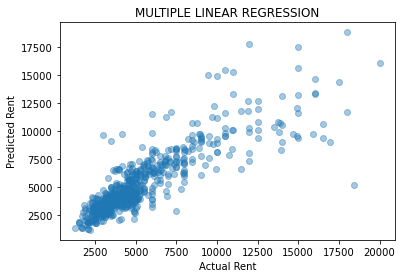

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))

plt.scatter(y_test, y_pred, alpha=.4) # x: 실제 임대료, y: 예측 임대료
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

임대료가 낮을수록 예측력이 높지만 높은 임대료에서는 오차가 좀 있는 걸 알 수 있다.

### 교차검증

sklearn에서 제공하는 교차 검증 함수: K-Fold, Stratified K-Fold  
일반적인 방법은 K-Fold이고, Stratified K-Fold는 원본 데이터의 분포와 동일하게 각 폴드 세트의 데이터를 조절한다.

#### (1) cross_validate 함수 사용

In [13]:
scores = cross_validate(lr, x, y, scoring = "neg_mean_squared_error",
                       cv = 5, return_train_score = True)
scores

# fit_time : 훈련 시간
# score_time : 테스트 시간
# test_score : 훈련 점수
# train_score : 테스트 점수

{'fit_time': array([0.00897551, 0.01097274, 0.00698113, 0.00997567, 0.00897622]),
 'score_time': array([0.0029912 , 0.00498486, 0.01296592, 0.00598192, 0.00598359]),
 'test_score': array([-2373068.7534198 , -1955696.66200224, -2233334.12812083,
        -2406372.03014713, -2270754.60212454]),
 'train_score': array([-2173030.80685561, -2276676.62476566, -2202492.14512612,
        -2165143.96144873, -2195688.79302247])}

In [20]:
mse =  -1 * scores['train_score']
mse

array([2173030.80685561, 2276676.62476566, 2202492.14512612,
       2165143.96144873, 2195688.79302247])

In [21]:
rmse = np.sqrt(mse)
rmse

array([1474.12035019, 1508.86600623, 1484.07956159, 1471.44281623,
       1481.78567716])

In [22]:
print('rmse 평균: {:.3f}'.format(np.mean(rmse)))

rmse 평균: 1484.059


In [31]:
pd.DataFrame(scores, index=['case1', 'case2', 'case3', 'case4', 'case5'])

,fit_time,score_time,test_score,train_score
case1,0.008976,0.002991,-2.373069e+06,-2.173031e+06
case2,0.010973,0.004985,-1.955697e+06,-2.276677e+06
case3,0.006981,0.012966,-2.233334e+06,-2.202492e+06
case4,0.009976,0.005982,-2.406372e+06,-2.165144e+06
case5,0.008976,0.005984,-2.270755e+06,-2.195689e+06


In [24]:
# 모든 케이스의 평균
pd.DataFrame(scores).describe().iloc[[1], :]

,fit_time,score_time,test_score,train_score
mean,0.009176,0.006581,-2.247845e+06,-2.202606e+06


In [28]:
np.mean(scores['test_score'])

-2247845.2351629077

#### (2) cross_val_score 함수 사용

cross_val_score에서 수행해주는 Cross validation방법은 일반적인 K-fold가 아닌 Stratified K-fold 검증방법을 사용한다.

In [29]:
cross_val_score(lr, x, y, cv=5)

array([0.75489796, 0.7735212 , 0.76280653, 0.79320113, 0.78472062])

In [30]:
print('교차 검증 평균: {:.3f}'.format(np.mean(cross_val_score(lr, x, y, cv=5))) )

교차 검증 평균: 0.774
